### Use sciann kernel

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ast
import tikzplotlib
%matplotlib inline

FBPINNs parameters

In [2]:
# set noise_level to 0.005 or 0.05
noise_level = 0.05

root_dir = f"Noise_{noise_level}"

# Verify directory exists
if not os.path.exists(root_dir):
    print(f"Directory does not exist: {root_dir}")
else:
    print(f"Directory exists: {root_dir}")
    metrics_files = [f for f in os.listdir(root_dir) if "parameters" in f and "FBPINN" in f]

    print(metrics_files)
    # convert metrics files to dataframes
    metrics_dfs = [pd.read_csv(f"{root_dir}/{f}") for f in metrics_files]
    metrics_dfs[0].head()
    
df = metrics_dfs[0] 


Directory exists: Noise_0.05
['FBPINN_combined_parameters.csv']


SciANN Parameters

In [3]:
# Verify directory exists
if not os.path.exists(root_dir):
    print(f"Directory does not exist: {root_dir}")
else:
    print(f"Directory exists: {root_dir}")
    metrics_files = [f for f in os.listdir(root_dir) if "params" in f and "SciANN" in f]

    print(metrics_files)
    # convert metrics files to dataframes
    metrics_dfs = [pd.read_csv(f"{root_dir}/{f}") for f in metrics_files]
    metrics_dfs[0].head()
    
df = metrics_dfs[0] 
def parse_params(param_string):
    return [float(x) for x in param_string.strip('[]').split()]

# to list
df['true_params'] = df['true_params'].apply(parse_params)
df['learned_params'] = df['learned_params'].apply(parse_params)

Directory exists: Noise_0.05
['SciANN_combined_params.csv']


Compare two package

In [4]:
# Verify directory exists
if not os.path.exists(root_dir):
    print(f"Directory does not exist: {root_dir}")
else:
    print(f"Directory exists: {root_dir}")
    sciann_files = [f for f in os.listdir(root_dir) if "metrices" in f and "SciANN" in f]
    fbpinn_files = [f for f in os.listdir(root_dir) if "metrices" in f and "FBPINN" in f]

    # convert metrics files to dataframes
    fbpinn_df = [pd.read_csv(f"{root_dir}/{f}") for f in fbpinn_files][0]
    sciann_df = [pd.read_csv(f"{root_dir}/{f}") for f in sciann_files][0]

fbpinn_df = fbpinn_df.rename(columns={'mse_test': 'MSE'})
sciann_df = sciann_df.rename(columns={'mse_test': 'MSE'})

sciann_df['Source'] = 'SciANN'
fbpinn_df['Source'] = 'FBPINN'
combined_df = pd.concat([sciann_df[['model_type', 'time_limit', 'MSE', 'Source']],
                         fbpinn_df[['model_type', 'time_limit', 'MSE', 'Source']]])

Directory exists: Noise_0.05


In [8]:
# mappings and settings
model_type_mapping = {'sg': 'SG', 'coexistence': 'COEX', 'survival': 'SURV'}
columns_order = ['SciANN', 'FBPINN']
model_types = list(model_type_mapping.values())
titles = ['(a) Saturated Growth', '(b) Coexistence', '(c) Single-survival']

# pivot table
pivot_df = (
    combined_df.pivot_table(index=['model_type', 'time_limit'], columns='Source', values='MSE')
    .reindex(model_type_mapping.keys(), level=0)
    .rename(index=model_type_mapping)
    .loc[:, columns_order]
)


C:\Users\tirth\AppData\Local\Temp\ipykernel_24228\3812895911.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels(axs[i].get_yticks(), fontsize=20)
c:\Users\tirth\anaconda3\envs\sciann\lib\site-packages\tikzplotlib\_hatches.py:65: UserWarning: tikzplotlib: Hatch '//' cannot be rendered. Only single character hatches are supported, e.g., {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}. Hatch '/' will be used.
  warnings.warn(


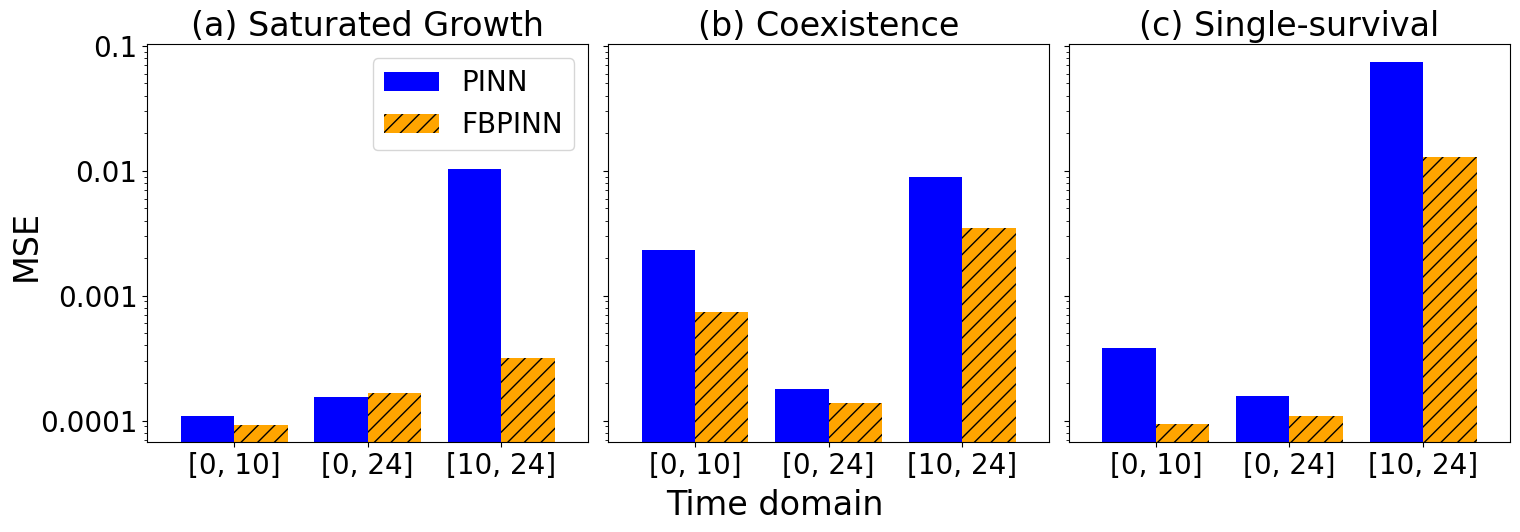

In [9]:
import matplotlib.pyplot as plt

def change_formate(x = '0-10'):
    x = x.split('-')
    x = [int(i) for i in x]
    return x

# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot 
for i, model_type in enumerate(model_types):
    # Filter 
    model_df = pivot_df.xs(model_type, level='model_type')
    
    # bars
    bars = model_df.plot(kind='bar', ax=axs[i], logy=True, color=['blue', 'orange'], width=0.8)
    
    # stripes only to the FBPINN bars (orange)
    for patch in bars.patches:
        if patch.get_facecolor() == (1.0, 0.6470588235294118, 0.0, 1.0):  # Check for the RGB value of the orange color
            patch.set_hatch('//')
    
    # ticks
    axs[i].set_xticklabels([f'{change_formate(time_limit)}' for time_limit in model_df.index], fontsize=20, rotation=0)
    axs[i].set_yticklabels(axs[i].get_yticks(), fontsize=20)
    
    axs[i].set_title(titles[i], fontsize=24)
    
    if i != 0:
        axs[i].set_ylabel('')
    
    axs[i].set_xlabel('')

# Set a common label
fig.text(0.5, -0.04, 'Time domain', ha='center', fontsize=24)
fig.text(-0.01, 0.5, r'MSE', va='center', rotation='vertical', fontsize=24)

# Adjust legend (first subplot)
axs[0].legend(['PINN', 'FBPINN'], fontsize=20)
axs[1].get_legend().remove()
axs[2].get_legend().remove()

plt.tight_layout()
tikzplotlib.save("VPINNsVsFBPINNs2.tex")